**Social Media Engagement Clustering using K-Means**

**Project Overview**

This project applies K-Means clustering to Facebook Live Sellers dataset to identify engagement-based content groups. The objective is to segment posts based on interaction patterns such as reactions, comments, and shares.

Understanding these clusters helps in identifying high-performing content strategies.

## Dataset Description

The dataset contains information about Facebook live posts including:

- Status Type
- Number of reactions
- Comments
- Shares
- Likes
- Other engagement metrics

This dataset helps in understanding which type of posts generate higher engagement.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans

**Importing data and analysing it**

In [2]:
data=pd.read_csv('/content/Facebook_Marketplace_data.csv')
data.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [3]:
data.shape
data.info()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   int64  
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(10), object(2)
memory

,0
status_id,0
status_type,0
status_published,0
num_reactions,0
num_comments,0
num_shares,0
num_likes,0
num_loves,0
num_wows,0
num_hahas,0


**Deleting the Unrequired column**

In [4]:
data = data.dropna(axis=1, how='all')

In [5]:
data.info()
#checking

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   status_id         7050 non-null   int64 
 1   status_type       7050 non-null   object
 2   status_published  7050 non-null   object
 3   num_reactions     7050 non-null   int64 
 4   num_comments      7050 non-null   int64 
 5   num_shares        7050 non-null   int64 
 6   num_likes         7050 non-null   int64 
 7   num_loves         7050 non-null   int64 
 8   num_wows          7050 non-null   int64 
 9   num_hahas         7050 non-null   int64 
 10  num_sads          7050 non-null   int64 
 11  num_angrys        7050 non-null   int64 
dtypes: int64(10), object(2)
memory usage: 661.1+ KB


Understanding how does the time of upload (`status_published`)  affects the `num_reaction`

In [6]:
data['status_published']= pd.to_datetime(data['status_published'])
#it converts text data into proper form to analyse da and time

In [7]:
data['hour'] = data['status_published'].dt.hour
data.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,hour
0,1,video,2018-04-22 06:00:00,529,512,262,432,92,3,1,1,0,6
1,2,photo,2018-04-21 22:45:00,150,0,0,150,0,0,0,0,0,22
2,3,video,2018-04-21 06:17:00,227,236,57,204,21,1,1,0,0,6
3,4,photo,2018-04-21 02:29:00,111,0,0,111,0,0,0,0,0,2
4,5,photo,2018-04-18 03:22:00,213,0,0,204,9,0,0,0,0,3


In [8]:
#calculate average reactions per hour:
hour_reactions = data.groupby('hour')['num_reactions'].mean()
hour_reactions

,num_reactions
hour,
0,261.839474
1,203.315725
2,163.907618
3,290.270208
4,242.685864
5,293.870968
6,340.213198
7,183.301549
8,204.796897


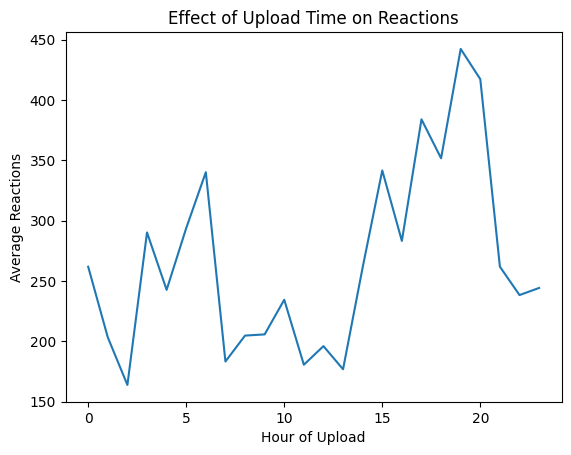

In [9]:
plt.figure()
hour_reactions.plot()
plt.xlabel("Hour of Upload")
plt.ylabel("Average Reactions")
plt.title("Effect of Upload Time on Reactions")
plt.show()

The average number of reactions was analyzed based on the upload hour. It was observed that posts uploaded during evening hours (18:00–20:00) receive significantly higher engagement compared to early morning hours. This indicates that user activity is higher in the evening, and upload timing has a noticeable impact on post reactions.

**Looking if there is a correlation between the number of reactions (num_reactions) and other engagement metrics such as comments (num_comments) and shares (num_shares). If so, what is the strength and direction of this correlation?**

In [10]:
data[['num_reactions','num_comments','num_shares']].corr()

,num_reactions,num_comments,num_shares
num_reactions,1.000000,0.150843,0.250723
num_comments,0.150843,1.000000,0.640637
num_shares,0.250723,0.640637,1.000000


From this we can interpret that num_reactions has more linear relationship with num_shares
From this we can interpret that num_comments has more linear relationship with num_shares
From this we can interpret that num_reactions has more linear relationship with num_comments
(All in positive direction)


**To train a K-Means clustering model on the Facebook Live Sellers dataset**

In [11]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['status_type_encoded'] = le.fit_transform(data['status_type'])

In [12]:
X = data[['status_type_encoded',
          'num_reactions',
          'num_comments',
          'num_shares',
          'num_likes',
          'num_loves',
          'num_wows',
          'num_hahas',
          'num_sads',
          'num_angrys']]


In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

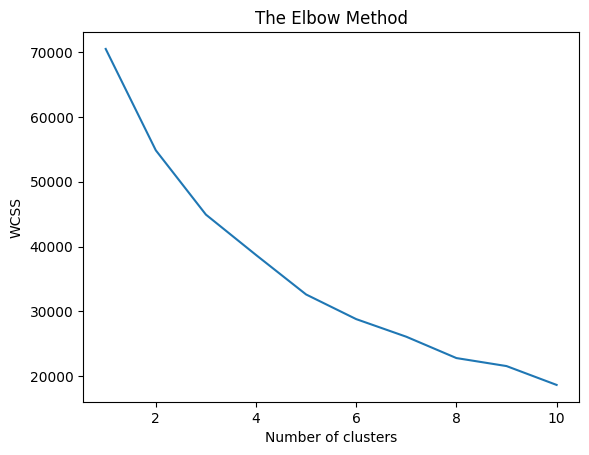

In [14]:
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Using the Elbow Method on the scaled dataset, the WCSS sharply decreases up to 3 clusters and then reduces gradually. The bend in the curve appears at 3 clusters. Therefore, the optimal number of clusters is 3.

In [15]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
data['Cluster'] = kmeans.fit_predict(X_scaled)

In [16]:
data['Cluster'].value_counts()


,count
Cluster,
0,6362
2,368
1,320


Cluster 0 represents low engagement posts.

Cluster 1 represents medium engagement posts.

Cluster 2 represents high engagement posts.

In [17]:
data.groupby('Cluster')[['num_reactions','num_comments','num_shares']].mean()

,num_reactions,num_comments,num_shares
Cluster,,,
0,112.964634,93.420465,19.746935
1,716.421875,3014.475000,475.637500
2,1832.581522,61.785326,11.752717


The K-Means algorithm divided the dataset into 3 clusters.
Cluster 2 shows the highest average values of reactions, comments, and shares, indicating high-engagement posts.
Cluster 1 represents medium-engagement posts.
Cluster 0 contains the majority of posts (6362) and represents low-engagement content.

This indicates that only a small percentage of posts generate very high engagement, while most posts receive relatively lower interaction

**Silhouette Score**

In [18]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X_scaled, kmeans.labels_)
print("Silhouette Score:", score)

Silhouette Score: 0.6590656446499957


The silhouette score indicates how well-separated the clusters are.
A score closer to 1 suggests well-defined clusters.

**Evaluating count of different types of posts in the dataset**

In [19]:
data['status_type'].value_counts()

,count
status_type,
photo,4288
video,2334
status,365
link,63


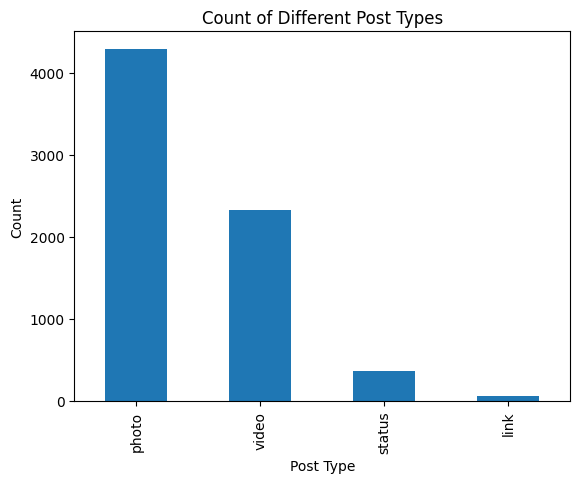

In [20]:
plt.figure()
data['status_type'].value_counts().plot(kind='bar')
plt.xlabel("Post Type")
plt.ylabel("Count")
plt.title("Count of Different Post Types")
plt.show()

The dataset contains four types of posts: video, photo, status, and link. Among them, videos (or whichever is highest in your result) are the most frequent post type, while links (or whichever lowest) are the least frequent.

**Understanding what the average value of num_reaction, num_comments, num_shares for each post type**

In [21]:
data.groupby('status_type')[['num_reactions','num_comments','num_shares']].mean()


,num_reactions,num_comments,num_shares
status_type,,,
link,370.142857,5.698413,4.396825
photo,181.290345,15.993470,2.553871
status,438.783562,36.238356,2.558904
video,283.409597,642.478149,115.679949


Video posts have the highest average engagement in terms of reactions, comments, and shares. Photo posts show moderate engagement, while status and link posts receive comparatively lower engagement.

## Conclusion

- Posts can be grouped into distinct engagement clusters.
- Certain types of posts generate significantly higher interaction.
- Feature scaling improved clustering performance.
- The silhouette score indicates meaningful cluster separation.

This project demonstrates practical application of unsupervised
learning techniques in real-world social media analytics.